In [1]:
import keras
from keras import layers
from keras import models
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
import os
from os.path import join
import cv2
import tensorflow as tf
from cv2 import resize

Using TensorFlow backend.


In [0]:
import requests
import io

url="http://www.utdallas.edu/~nxp180001/Face_Detection/train.csv"
x=requests.get(url).content
labels=pd.read_csv(io.StringIO(x.decode('utf-8')),error_bad_lines=False)

In [3]:
len(labels)

28709

In [0]:
from PIL import Image

image_data = []
for i in range(len(labels)):
    lab=labels['pixels'][i].split(' ')
    var = [float(i) for i in lab]
    image_data.append(var)


In [0]:
train_images=np.array(image_data)


In [7]:

train_images=train_images.reshape((28709,48,48,1))
train_images.shape

(28709, 48, 48, 1)

In [0]:
train_images = train_images / 255


In [0]:
#----Reading the labels
train_labels = to_categorical(labels['emotion'])


In [11]:
###################### First model ########
model1 = models.Sequential()
model1.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(48,48,1)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(2048, activation = 'relu'))
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dense(7, activation='softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [12]:
from keras import optimizers

opt = optimizers.RMSprop(lr=0.001, decay=1e-6)
model1.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model1.fit(train_images[:23000], train_labels[:23000], epochs=10, batch_size=64)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





23000/23000 [==============================] - 115s 5ms/step - loss: 1.7125 - acc: 0.3278
Epoch 2/10
23000/23000 [==============================] - 116s 5ms/step - loss: 1.4190 - acc: 0.4527
Epoch 3/10
23000/23000 [==============================] - 116s 5ms/step - loss: 1.2614 - acc: 0.5178
Epoch 4/10
23000/23000 [==============================] - 115s 5ms/step - loss: 1.1284 - acc: 0.5705
Epoch 5/10
23000/23000 [==============================] - 114s 5ms/step - loss: 0.9807 - acc: 0.6287
Epoch 6/10
23000/23000 [==============================] - 113s 5ms/step - loss: 0.8401 - acc: 0.6879
Epoch 7/10
23000/23000 [==============================] - 114s 5ms/step - loss: 0.7096 - acc: 0.7393
Epoch 8/10
23000/23000 [==============================] - 115s 5ms/step - loss: 0.6063 - acc: 0.7800
Epoch 9/10
23000/23000 [==============================] - 116s 5ms/step - loss: 0.5453 -

In [0]:
model1.save('my_model1.h5')

In [14]:
test_loss, test_acc = model1.evaluate(train_images[23000:], train_labels[23000:])
test_loss

5709/5709 [==============================] - 7s 1ms/step


2.030672476742267

In [15]:
test_acc

0.5458048695095117

In [16]:
history.history['loss']

[1.712474841200787,
 1.418976127334263,
 1.261404947840649,
 1.1284044613630875,
 0.9806569320015285,
 0.8401337279029515,
 0.7096027620978977,
 0.606300459716631,
 0.5452606471621472,
 0.5056515824587449]

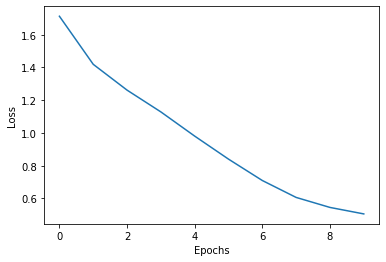

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel( 'Loss' )
plt.xlabel( 'Epochs' )
plt.show()

In [18]:
history.history['acc']

[0.3278260869565217,
 0.4526956521842791,
 0.5177826087163843,
 0.5705217391200688,
 0.6286521739130435,
 0.6878695652173913,
 0.7393478260662245,
 0.78,
 0.8093913043478261,
 0.8264347825879637]

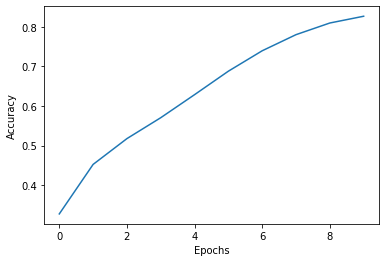

In [20]:

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epochs' )
plt.show()

In [22]:
###################### Second model ########
model2 = models.Sequential()
model2.add(layers.Conv2D(64,(3,3),activation='relu', input_shape=(48,48,1)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(1024, activation = 'relu'))
model2.add(layers.Dense(512, activation = 'relu'))
model2.add(layers.Dense(7, activation='softmax'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)             

In [23]:
from keras import optimizers

opt = optimizers.RMSprop(lr=0.001, decay=1e-6)
model2.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model2.fit(train_images[:23000], train_labels[:23000], epochs=10, batch_size=64)

Epoch 1/10
23000/23000 [==============================] - 119s 5ms/step - loss: 1.6791 - acc: 0.3267
Epoch 2/10
23000/23000 [==============================] - 119s 5ms/step - loss: 1.4095 - acc: 0.4565
Epoch 3/10
23000/23000 [==============================] - 120s 5ms/step - loss: 1.2666 - acc: 0.5152
Epoch 4/10
23000/23000 [==============================] - 120s 5ms/step - loss: 1.1378 - acc: 0.5693
Epoch 5/10
23000/23000 [==============================] - 120s 5ms/step - loss: 1.0532 - acc: 0.6056
Epoch 6/10
23000/23000 [==============================] - 120s 5ms/step - loss: 0.9438 - acc: 0.6462
Epoch 7/10
23000/23000 [==============================] - 120s 5ms/step - loss: 0.8286 - acc: 0.6944
Epoch 8/10
23000/23000 [==============================] - 121s 5ms/step - loss: 0.7345 - acc: 0.7346
Epoch 9/10
23000/23000 [==============================] - 120s 5ms/step - loss: 0.6702 - acc: 0.7622
Epoch 10/10
23000/23000 [==============================] - 121s 5ms/step - loss: 0.6206 - a

In [24]:
model2.save('my_model2.h5')
test_loss, test_acc = model2.evaluate(train_images[23000:], train_labels[23000:])
test_loss


5709/5709 [==============================] - 8s 1ms/step


1.9405056510044285

In [25]:
test_acc

0.5375722543509208

In [26]:
history.history['loss']

[1.6790643356986668,
 1.4095354693454245,
 1.2665931198285973,
 1.1377621476131936,
 1.0531812674273615,
 0.9437608695652174,
 0.8286220616050388,
 0.7344633740756823,
 0.670216377341229,
 0.6205684196638024]

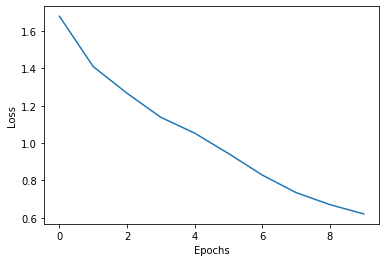

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel( 'Loss' )
plt.xlabel( 'Epochs' )
plt.show()

In [28]:
history.history['acc']

[0.32665217389231144,
 0.45647826089029725,
 0.5152173912939818,
 0.5692608695652174,
 0.605608695672906,
 0.6462173913250798,
 0.694391304347826,
 0.734608695672906,
 0.7622173913043478,
 0.7832173913043479]

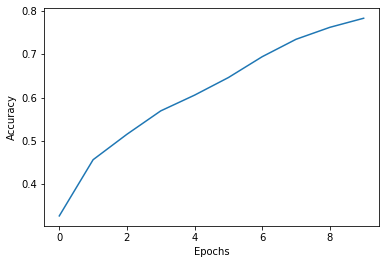

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epochs' )
plt.show()

In [30]:
###################### Third model ########
model3 = models.Sequential()
model3.add(layers.Conv2D(64,(3,3),activation='relu', input_shape=(48,48,1)))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128,(3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(2048, activation = 'relu'))
model3.add(layers.Dense(512, activation = 'relu'))
model3.add(layers.Dense(7, activation='softmax'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)             

In [31]:
from keras import optimizers

opt = optimizers.RMSprop(lr=0.001, decay=1e-6)
model3.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model3.fit(train_images[:23000], train_labels[:23000], epochs=10, batch_size=64)

Epoch 1/10
23000/23000 [==============================] - 211s 9ms/step - loss: 1.7654 - acc: 0.3004
Epoch 2/10
23000/23000 [==============================] - 211s 9ms/step - loss: 1.5140 - acc: 0.4122
Epoch 3/10
23000/23000 [==============================] - 212s 9ms/step - loss: 1.3947 - acc: 0.4628
Epoch 4/10
23000/23000 [==============================] - 213s 9ms/step - loss: 1.3014 - acc: 0.5020
Epoch 5/10
23000/23000 [==============================] - 217s 9ms/step - loss: 1.2316 - acc: 0.5315
Epoch 6/10
23000/23000 [==============================] - 217s 9ms/step - loss: 1.1629 - acc: 0.5588
Epoch 7/10
23000/23000 [==============================] - 215s 9ms/step - loss: 1.1066 - acc: 0.5835
Epoch 8/10
23000/23000 [==============================] - 216s 9ms/step - loss: 1.0479 - acc: 0.6107
Epoch 9/10
23000/23000 [==============================] - 215s 9ms/step - loss: 1.0048 - acc: 0.6265
Epoch 10/10
23000/23000 [==============================] - 218s 9ms/step - loss: 0.9650 - a

In [32]:
model3.save('my_model3.h5')
test_loss, test_acc = model3.evaluate(train_images[23000:], train_labels[23000:])
test_loss

5709/5709 [==============================] - 17s 3ms/step


1.719252616976205

In [33]:
test_acc

0.5233841303727489

In [34]:
history.history['loss']

[1.7654309077470198,
 1.514004362396572,
 1.3946681509847227,
 1.301383000207984,
 1.23164294122613,
 1.1629280262408048,
 1.1065965456340623,
 1.0478818883481233,
 1.0048284664776015,
 0.9650364718229875]

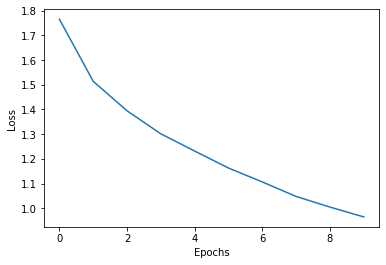

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel( 'Loss' )
plt.xlabel( 'Epochs' )
plt.show()

In [36]:
history.history['acc']

[0.3003913043581921,
 0.4122173913043478,
 0.4628260869772538,
 0.5019565217494965,
 0.5315217391304348,
 0.5588260869668877,
 0.5834782608799313,
 0.6107391304140506,
 0.6264782608902972,
 0.6417391304555147]

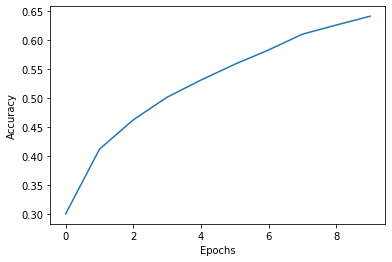

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epochs' )
plt.show()

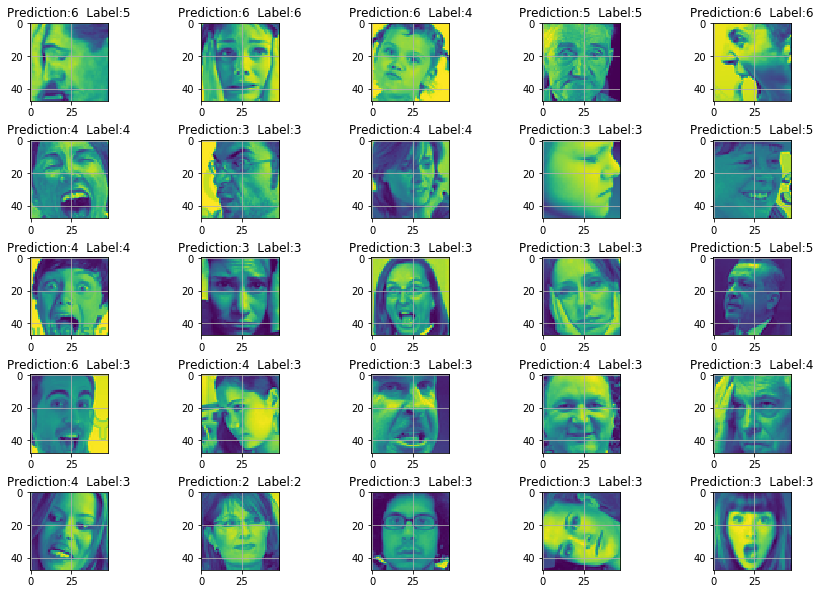

In [48]:
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter 


plt.figure()

predictions=model1.predict(train_images[27025:27050])
count = 24000
c=1
for pred,lab in zip(predictions,train_labels[27025:27050]):
    pic = train_images[count] * 255
    count+=1
    pic=pic.reshape((48,48))     
    plt.subplot(5,5,c)
    plt.imshow(pic.astype(int))
    x=str(np.where(pred==max(pred))[0])[1:-1]
    y=str(np.where(lab==1.)[0])[1:-1]
    titl="Prediction:"+x+"  Label:"+y
    plt.title(titl)
    plt.grid(True)
    c+=1
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=2, bottom=0.1, left=0.09, right=2, hspace=0.5,
                    wspace=0.2)
plt.show()
